# Bike Sharing in Makati City
#### Crisanto Chua & Jeddahlyn Gacera

###  Predicting bike rental problem

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


Attribute Information:

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- count: count of total rental bikes including both casual and registered

The dataset was sourced from Hadi Fanaee of Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto , INESC Porto, Campus da FEUP, Rua Dr. Roberto Frias, 378, 4200 - 465 Porto, Portugal.  

Original Source: http://capitalbikeshare.com/system-data <br>
Weather Information: http://www.freemeteo.com <br>
Holiday Schedule: http://dchr.dc.gov/page/holiday-schedule

## Data preparation and processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score

In [2]:
df_bikesharing = pd.read_csv('hour.csv')
dummy = df_bikesharing.copy()
dummy.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


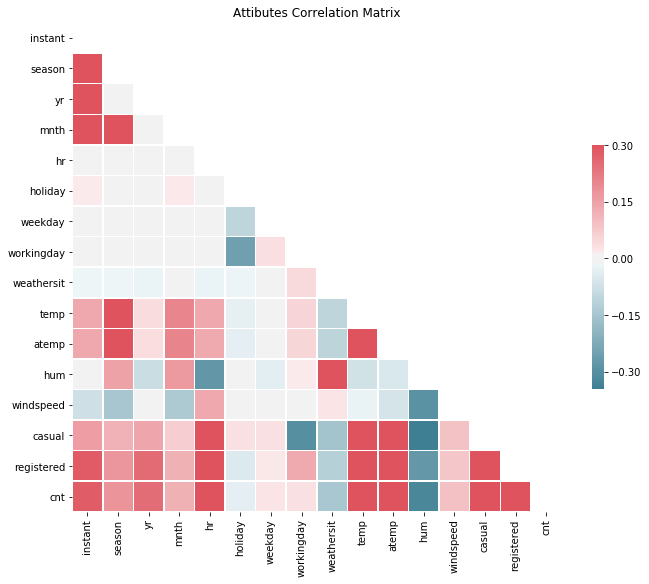

In [3]:
corr = dummy.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
# ax.axes.set_title("Attibutes Correlation Matrix", fontsize=12, y=1.01);
ax.set_title('Attibutes Correlation Matrix');

In [4]:
df_X = dummy.copy()

for col in ['season', 'mnth', 'hr', 'weekday', 'weathersit']:
    dummies = pd.get_dummies(df_X[col], prefix=col)
    df_X = pd.concat([df_X, dummies], axis=1)

In [5]:
for i in range(1, 25):
    df_X['cnt+'+str(i)] = df_X.cnt.shift(i)
    
df_X.dropna(inplace=True)

In [6]:
df_X.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_1', 'season_2', 'season_3',
       'season_4', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0',
       'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9',
       'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17',
       'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weathersit_1', 'weathersit_2', 'weathersit_3',
       'weathersit_4', 'cnt+1', 'cnt+2', 'cnt+3', 'cnt+4', 'cnt+5', 'cnt+6',
       'cnt+7', 'cnt+8', 'cnt+9', 'cnt+10', 'cnt+11', 'cnt+12', 'cnt+13',
       'cnt+14', 'cnt+15', 'cnt+16', 'cnt+17', 'cnt+18', 'cnt+19', 'cnt+20',
       'cnt+21', 

In [7]:
df_features = df_X.drop(columns=['cnt', 'instant', 'dteday', 'registered', 'casual', 'temp', 
                                 'season', 'mnth', 'hr', 'weekday', 'weathersit'])

In [8]:
df_features.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'season_1',
       'season_2', 'season_3', 'season_4', 'mnth_1', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5',
       'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13',
       'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21',
       'hr_22', 'hr_23', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'cnt+1', 'cnt+2', 'cnt+3', 'cnt+4',
       'cnt+5', 'cnt+6', 'cnt+7', 'cnt+8', 'cnt+9', 'cnt+10', 'cnt+11',
       'cnt+12', 'cnt+13', 'cnt+14', 'cnt+15', 'cnt+16', 'cnt+17', 'cnt+18',
       'cnt+19', 'cnt+20', 'cnt+21', 'cnt+22', 'cnt+23', 'cnt+24'],
      dtype='object')

In [9]:
X_raw = df_features.copy()
y_raw = df_X['cnt']

In [10]:
X_raw.shape

(17355, 81)

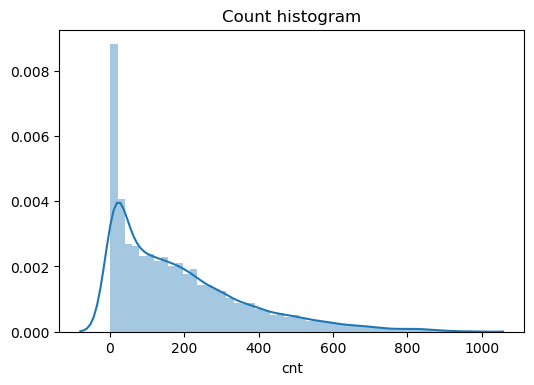

In [187]:
fig, ax = plt.subplots(dpi=100)
ax = sns.distplot(y_raw)
ax.set_title('Count histogram')
fig;

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.25, random_state=42)

In [16]:
X_train.shape

(13016, 81)

In [20]:
len(X_train[0])

81

In [17]:
sscaler = StandardScaler()
X_train = sscaler.fit_transform(X_train)
X_test = sscaler.transform(X_test)

### Traditional ML regressors (ML 1.0)

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [117]:
nn = [3, 4, 5]
alpha_list = [1e-12, 1e-8, 1e-4, 1e-3, 0.1, 0.2, 0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000, 10000]
gamma_list = [1e-12, 1e-4, 0.1, 1, 5, 20, 1000, 5000, 10000]
svm_C_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
max_depth_list = [3, 4, 5]
n_est_list = [100, 400, 600]
learn_rate_list = [0.05, 0.1, 0.2]

In [113]:
kNN = GridSearchCV(KNeighborsRegressor(), iid=False, cv=5, n_jobs=-1, verbose=0, param_grid={'n_neighbors': nn}
                  ).fit(X_train, y_train)
kNN_be = kNN.best_estimator_.fit(X_train, y_train)

In [130]:
LR = GridSearchCV(LinearRegression(), iid=False, cv=5, n_jobs=-1, verbose=0, param_grid={}).fit(X_train, y_train)
LR_be = LR.best_estimator_.fit(X_train, y_train)

In [115]:
Ridge_ = GridSearchCV(Ridge(), iid=False, cv=5, n_jobs=-1, verbose=0, param_grid={'alpha': alpha_list}).fit(X_train, y_train)
Ridge_be = Ridge_.best_estimator_.fit(X_train, y_train)

In [116]:
Lasso_ = GridSearchCV(Lasso(max_iter=5000), iid=False, cv=5, n_jobs=-1, verbose=0, param_grid={'alpha': alpha_list}
                     ).fit(X_train, y_train)
Lasso_be = Lasso_.best_estimator_.fit(X_train, y_train)

In [118]:
SVR_ = GridSearchCV(SVR(), iid=False, cv=5, n_jobs=-1, verbose=0, param_grid={'gamma': gamma_list, 'C': svm_C_list}
                   ).fit(X_train, y_train)
SVR_be = SVR_.best_estimator_.fit(X_train, y_train)

In [120]:
DT = GridSearchCV(DecisionTreeRegressor(), iid=False, cv=5, n_jobs=-1, verbose=0, param_grid={'max_depth': max_depth_list}
                 ).fit(X_train, y_train)
DT_be = DT.best_estimator_.fit(X_train, y_train)

In [121]:
RF = GridSearchCV(RandomForestRegressor(), iid=False, cv=5, n_jobs=-1, verbose=0, 
                  param_grid={'n_estimators': n_est_list, 'max_depth': max_depth_list}
                 ).fit(X_train, y_train)
RF_be = RF.best_estimator_.fit(X_train, y_train)

In [122]:
GBM = GridSearchCV(GradientBoostingRegressor(), iid=False, cv=5, n_jobs=-1, verbose=0, 
                   param_grid={'n_estimators': n_est_list, 'max_depth': max_depth_list, 'learning_rate': learn_rate_list}
                  ).fit(X_train, y_train)
GBM_be = GBM.best_estimator_.fit(X_train, y_train)

In [155]:
df_res = pd.DataFrame(columns=['ML Regression Method', 'Train Accuracy', 
                               'Test Accuracy', 'Best Parameters', 'Top Predictor'])

df_res.loc[0] = ['kNN', kNN_be.score(X_train, y_train), kNN_be.score(X_test, y_test), kNN.best_params_, 'N/A']
df_res.loc[1] = ['Linear Regression', LR_be.score(X_train, y_train), LR_be.score(X_test, y_test), 'N/A', 
                 (X_raw.columns[np.abs(LR_be.coef_).argsort()[-1]], LR_be.coef_[np.abs(LR_be.coef_).argsort()[-1]])]
df_res.loc[2] = ['Ridge', Ridge_be.score(X_train, y_train), Ridge_be.score(X_test, y_test), Ridge_.best_params_, 
                 (X_raw.columns[np.abs(Ridge_be.coef_).argsort()[-1]], Ridge_be.coef_[np.abs(Ridge_be.coef_).argsort()[-1]])]
df_res.loc[3] = ['Lasso', Lasso_be.score(X_train, y_train), Lasso_be.score(X_test, y_test), Lasso_.best_params_, 
                 (X_raw.columns[np.abs(Lasso_be.coef_).argsort()[-1]], Lasso_be.coef_[np.abs(Lasso_be.coef_).argsort()[-1]])]
df_res.loc[4] = ['Support Vector Regression', SVR_be.score(X_train, y_train), SVR_be.score(X_test, y_test), 
                     SVR_.best_params_, 'N/A']
df_res.loc[5] = ['Decision Tree', DT_be.score(X_train, y_train), DT_be.score(X_test, y_test), DT.best_params_, 
                 (X_raw.columns[np.abs(DT_be.feature_importances_).argsort()[-1]], 
                  DT_be.feature_importances_[np.abs(DT_be.feature_importances_).argsort()[-1]])]
df_res.loc[6] = ['Random Forest', RF_be.score(X_train, y_train), RF_be.score(X_test, y_test), RF.best_params_, 
                 (X_raw.columns[np.abs(RF_be.feature_importances_).argsort()[-1]], 
                  RF_be.feature_importances_[np.abs(RF_be.feature_importances_).argsort()[-1]])]
df_res.loc[7] = ['Gradient Boosting Method', GBM_be.score(X_train, y_train), GBM_be.score(X_test, y_test), GBM.best_params_, 
                 (X_raw.columns[np.abs(GBM_be.feature_importances_).argsort()[-1]], 
                  GBM_be.feature_importances_[np.abs(GBM_be.feature_importances_).argsort()[-1]])]

In [156]:
df_res

,ML Regression Method,Train Accuracy,Test Accuracy,Best Parameters,Top Predictor
0,kNN,0.929742,0.899337,{'n_neighbors': 5},N/A
1,Linear Regression,0.912676,0.910193,N/A,"(weathersit_1, 4834425935879.033)"
2,Ridge,0.912675,0.910208,{'alpha': 1.5},"(cnt+1, 182.66695749134607)"
3,Lasso,0.912676,0.910192,{'alpha': 0.001},"(cnt+1, 183.000869726043)"
4,Support Vector Regression,0.902729,0.901317,"{'C': 1000, 'gamma': 0.0001}",N/A
5,Decision Tree,0.870576,0.853383,{'max_depth': 5},"(cnt+1, 0.7681009023313109)"
6,Random Forest,0.904878,0.893970,"{'max_depth': 5, 'n_estimators': 600}","(cnt+1, 0.7612329755301417)"
7,Gradient Boosting Method,0.988021,0.963840,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...","(cnt+1, 0.6894038587626418)"


In [157]:
import pickle

res_ML1 = {'df': df_res, 'kNN': kNN, 'LR': LR, 'Ridge_': Ridge_, 'Lasso_': Lasso_, 'SVR_': SVR_, 'DT': DT, 'RF': RF, 'GBM': GBM}

with open('res_ML1.pkl', 'wb') as f:
    pickle.dump(res_ML1, f)

# with open('res_ML1.pkl', 'rb') as f:
#     res_ML1 = pickle.load(f)

### Manual Neural Network as a Regressor

#### Activation Function

In [60]:
def relu(x, deriv=False):
    function = np.maximum(0, x)
    if deriv==True:
        function = np.where(x > 0, 1, 0)
    return function

def sigmoid(x, deriv=False):
    function = 1/(1+np.exp(-x))
    if deriv==True:
        return function*(1-function)
    return function

#### Create function for Neural Network

In [61]:
def neural_network(args, X_train, X_test, y_train, y_test, func1, func2, no_iter):
    
    gamma1, gamma2, gamma3, gamma4 = args
    mscaler = MinMaxScaler()
    y_train = mscaler.fit_transform(pd.DataFrame(y_train))
    y_test = mscaler.transform(pd.DataFrame(y_test))
    
    no_inputs = len(X_train[0])
    no_hidden_1 = len(X_train[0])
    no_hidden_2 = len(X_train[0])//2
    no_hidden_3 = len(X_train[0])//4
    no_outputs = 1

    # randomly initialize our weights with mean 0
    w0 = 2*np.random.random((no_inputs, no_hidden_1)) - 1
    w1 = 2*np.random.random((no_hidden_1, no_hidden_2)) - 1
    w2 = 2*np.random.random((no_hidden_2, no_hidden_3)) - 1
    w3 = 2*np.random.random((no_hidden_3, no_outputs)) - 1

    # iterate until convergence
    for j in range(no_iter):

        # Feed forward through layers 0-4
        layer0 = X_train
        layer1 = func1(np.dot(layer0, w0))
        layer2 = func1(np.dot(layer1, w1))
        layer3 = func1(np.dot(layer2, w2))
        layer4 = func2(np.dot(layer3, w3))

        # error function
        layer4_error = y_train - layer4

        if j%(no_iter/20)==0:
            layer0_test = X_test
            layer1_test = func1(np.dot(layer0_test, w0))
            layer2_test = func1(np.dot(layer1_test, w1))
            layer3_test = func1(np.dot(layer2_test, w2))
            layer4_test = func2(np.dot(layer3_test, w3))
            print('Iteration No. =', j,
                  'Training =', r2_score(layer4, y_train),
                  'Test =', r2_score(layer4_test, y_test))

        # gradients
        layer4_d = layer4_error*func2(np.dot(layer3,w3),deriv=True)
        layer3_d = layer4_d.dot(w3.T)*func1(np.dot(layer2,w2),deriv=True)
        layer2_d = layer3_d.dot(w2.T)*func1(np.dot(layer1,w1),deriv=True)
        layer1_d = layer2_d.dot(w1.T)*func1(np.dot(layer0,w0),deriv=True)

        w3 += gamma4*layer3.T.dot(layer4_d)
        w2 += gamma3*layer2.T.dot(layer3_d)
        w1 += gamma2*layer1.T.dot(layer2_d)
        w0 += gamma1*layer0.T.dot(layer1_d)
    
    layer0_test = X_test
    layer1_test = func1(np.dot(layer0_test, w0))
    layer2_test = func1(np.dot(layer1_test, w1))
    layer3_test = func1(np.dot(layer2_test, w2))
    layer4_test = func2(np.dot(layer3_test, w3))
    print('\nTraining =', r2_score(layer4, y_train),
          'Test =', r2_score(layer4_test, y_test))
    return layer4

In [34]:
layer4 = neural_network([0.01, 0.0001, 0.0001, 0.0001], X_train, X_test, y_train, y_test, relu, sigmoid, 10000)

Iteration No. = 0 Training = -1.4593649167808236 Test = -1.4114875175014983
Iteration No. = 500 Training = 0.37833187485941067 Test = 0.38763698832724003
Iteration No. = 1000 Training = 0.6245233883172068 Test = 0.5919370139586098
Iteration No. = 1500 Training = 0.890189578021283 Test = 0.814490598271572
Iteration No. = 2000 Training = 0.917130898339466 Test = 0.8375325464537144
Iteration No. = 2500 Training = 0.9300044801737694 Test = 0.8487734976253183
Iteration No. = 3000 Training = 0.9429421723710418 Test = 0.8568396821934868
Iteration No. = 3500 Training = 0.9533671867602843 Test = 0.8599293937141496
Iteration No. = 4000 Training = 0.9602075329841349 Test = 0.8690960985199044
Iteration No. = 4500 Training = 0.9641431986118 Test = 0.8729256407916897
Iteration No. = 5000 Training = 0.967517583781399 Test = 0.8778346715510874
Iteration No. = 5500 Training = 0.9707201688681644 Test = 0.8798247240027983
Iteration No. = 6000 Training = 0.9727827525849189 Test = 0.8803735058152463
Iterat

### Implementing Tensorflow Keras

In [234]:
from tensorflow.keras import layers, models, backend as K

In [230]:
model = models.Sequential()
model.add(layers.Dense(df_features.shape[1], kernel_initializer='normal', input_dim=df_features.shape[1], activation='relu'))
model.add(layers.Dense(df_features.shape[1]//2, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(df_features.shape[1]//4, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(1, kernel_initializer='normal'))

In [191]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 81)                6642      
_________________________________________________________________
dense_1 (Dense)              (None, 40)                3280      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 10,763
Trainable params: 10,763
Non-trainable params: 0
_________________________________________________________________


In [231]:
def train_r2(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return ( 1 - SS_res/(SS_tot + K.epsilon()))

model.compile(loss='mse', optimizer='adam', metrics=['acc', train_r2])
model.fit(X_train, np.array(y_train), epochs=50);

Train on 13016 samples
Epoch 1/50
13016/13016 [==============================] - 1s 54us/sample - loss: 20761.5513 - acc: 0.0083 - train_r2: 0.3468
Epoch 2/50
13016/13016 [==============================] - 0s 33us/sample - loss: 2837.1020 - acc: 0.0091 - train_r2: 0.9048
Epoch 3/50
13016/13016 [==============================] - 0s 34us/sample - loss: 1911.9015 - acc: 0.0091 - train_r2: 0.9350
Epoch 4/50
13016/13016 [==============================] - 0s 33us/sample - loss: 1532.8598 - acc: 0.0091 - train_r2: 0.94820s - loss: 1540.1095 - acc: 0.0068 - train_r2
Epoch 5/50
13016/13016 [==============================] - 0s 34us/sample - loss: 1340.5604 - acc: 0.0076 - train_r2: 0.9540
Epoch 6/50
13016/13016 [==============================] - 0s 34us/sample - loss: 1242.2163 - acc: 0.0048 - train_r2: 0.9584
Epoch 7/50
13016/13016 [==============================] - 0s 34us/sample - loss: 1168.9701 - acc: 0.0043 - train_r2: 0.9604
Epoch 8/50
13016/13016 [==============================] - 0s 34

In [232]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.9662353937688215

In [247]:
# model.save_weights('model.h5')
# loaded_model.load_weights('model.h5')

# y_pred = loaded_model.predict(X_test)
# r2_score(y_test, y_pred)